In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import re

In [2]:
data = pd.read_csv("nlp-getting-started/train.csv")
data.head(5)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [3]:
############### CREATING METAFEATURES ##################
from nltk.corpus import stopwords
from string import punctuation

stopwords = set(stopwords.words('english'))

data["mean_word_length"] = data["text"].apply(lambda x: np.mean([len(w) for w in str(x).lower().split()]))
data["tweet_length"] = data["text"].apply(lambda x: len(x))
data["word_count"] = data["text"].apply(lambda x: len(str(x).split()))
data["stopwords_count"] = data["text"].apply(lambda x: len([w for w in str(x).lower().split(' ') if w in stopwords]))
data["punctuation_count"] = data["text"].apply(lambda x: len([p for p in str(x) if p in punctuation]))
data["url_count"] = data["text"].apply(lambda x: len([w for w in str(x).lower().split()
                                                      if "http" in w or "https" in w or "www" in w or "url" in w]))
data["hashtag_count"] = data["text"].apply(lambda x: len([w for w in str(x).lower().split() if "#" in w]))
data["@_count"] = data["text"].apply(lambda x: len([w for w in str(x).lower().split() if "@" in w]))

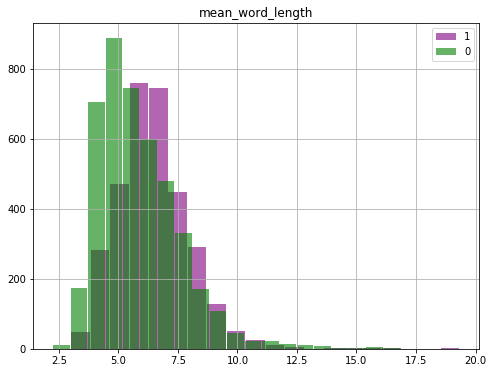

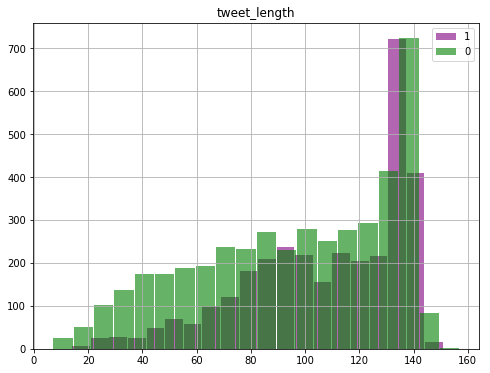

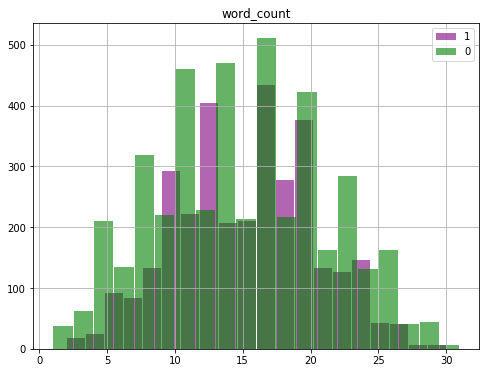

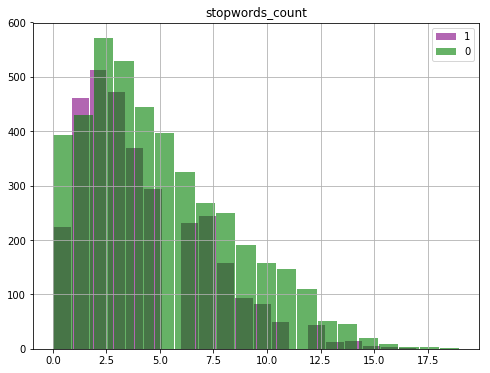

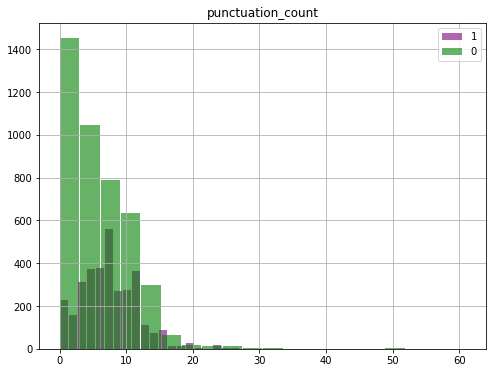

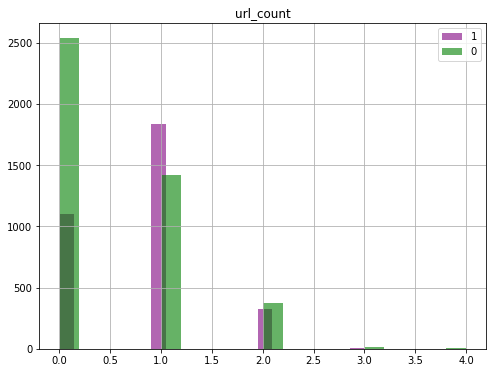

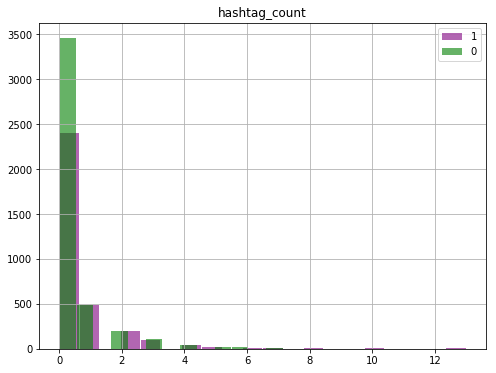

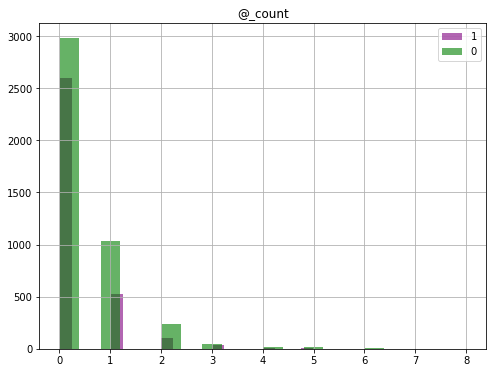

In [4]:
for column, row in data.items():
    if column not in ["id", "keyword", "location", "text", "target"]:
        plt.figure(figsize=[8,6])
        plt.title(column)
        data[column][data["target"]==1].hist(bins=20, color="purple", alpha=0.6, rwidth=0.95, label = "1")
        data[column][data["target"]==0].hist(bins=20, color="green", alpha=0.6, rwidth=0.95, label = "0")
        plt.legend()

In [39]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation

stopwords = set(stopwords.words('english'))
corpus = []

# data["text"] = data["text"].str.lower()
# data["tokens"] = data["text"].apply(nltk.word_tokenize)

def clean_data(text):
    
    # special characters
    text = re.sub(r"\x89Û_", "", text)
    text = re.sub(r"\x89ÛÒ", "", text)
    text = re.sub(r"\x89ÛÓ", "", text)
    text = re.sub(r"\x89ÛÏWhen", "When", text)
    text = re.sub(r"\x89ÛÏ", "", text)
    text = re.sub(r"China\x89Ûªs", "China's", text)
    text = re.sub(r"let\x89Ûªs", "let's", text)
    text = re.sub(r"\x89Û÷", "", text)
    text = re.sub(r"\x89Ûª", "", text)
    text = re.sub(r"\x89Û\x9d", "", text)
    text = re.sub(r"å_", "", text)
    text = re.sub(r"\x89Û¢", "", text)
    text = re.sub(r"\x89Û¢åÊ", "", text)
    text = re.sub(r"fromåÊwounds", "from wounds", text)
    text = re.sub(r"åÊ", "", text)
    text = re.sub(r"åÈ", "", text)
    text = re.sub(r"JapÌ_n", "Japan", text)    
    text = re.sub(r"Ì©", "e", text)
    text = re.sub(r"å¨", "", text)
    text = re.sub(r"SuruÌ¤", "Suruc", text)
    text = re.sub(r"åÇ", "", text)
    text = re.sub(r"å£3million", "3 million", text)
    text = re.sub(r"åÀ", "", text)
    
    
            
    #remove numbers
    text = re.sub(r'[0-9]', '', text)
    
    #remove single letters
    #text = re.sub(r'[a-z]', '', text)
    
    # remove punctuation and special chars (keep '!')
    for p in punctuation:
        text = text.replace(p, '')
    
    #remove urls
    text = re.sub(r'http\S+', '', text)
    
    #tokenize
    text = nltk.word_tokenize(text)
    
    #remove stopwords
    text = [w.lower() for w in text if not w in stopwords]
    corpus.append(text)
    return text
    

In [40]:
data["tokens"] = data["text"].apply(lambda x: clean_data(x))

In [42]:
corpus
data.head(5)

,id,keyword,location,text,target,mean_word_length,tweet_length,word_count,stopwords_count,punctuation_count,url_count,hashtag_count,@_count,tokens,stemmed_tokens,embedded_tokens
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,4.384615,69,13,6,1,0,1,0,our deeds reason earthquake may allah forgive us,"[our, deed, reason, earthquak, may, allah, for...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,4.571429,38,7,0,1,0,0,0,forest fire near la ronge sask canada,"[forest, fire, near, la, rong, sask, canada]","[[0.003924180753529072, 0.023121530190110207, ..."
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,5.090909,133,22,11,3,0,0,0,all residents asked shelter place notified off...,"[all, resid, ask, shelter, place, notifi, offi...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,7.125000,65,8,1,2,0,1,0,people receive wildfires evacuation orders cal...,"[peopl, receiv, wildfir, evacu, order, califor...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,4.500000,88,16,7,2,0,2,0,just got sent photo ruby alaska smoke wildfire...,"[just, got, sent, photo, rubi, alaska, smoke, ...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


In [35]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

data["stemmed_tokens"] = data["tokens"].map(lambda y: [stemmer.stem(x) for x in y])

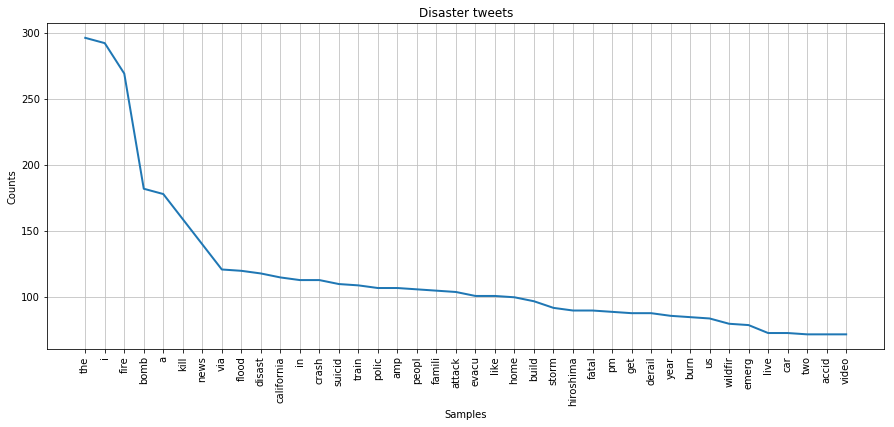

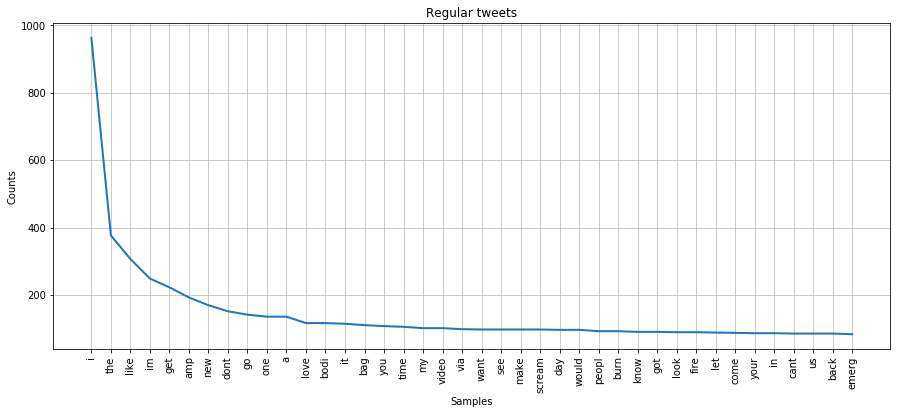

In [36]:
disaster_tweets = []
regular_tweets = []
build_vocab = []

for i, row in data.iterrows():
    if row["target"] == 1:
        disaster_tweets.append(row["stemmed_tokens"])
    else:
        regular_tweets.append(row["stemmed_tokens"])
    build_vocab.append(row["stemmed_tokens"])
        
disaster_tweets = [val for sublist in disaster_tweets for val in sublist]
regular_tweets = [val for sublist in regular_tweets for val in sublist]




freq_ds = nltk.FreqDist(disaster_tweets)
plt.figure(figsize=(15,6))
plt.title("Disaster tweets")
freq_ds.plot(40, cumulative=False)


freq_rg = nltk.FreqDist(regular_tweets)
plt.figure(figsize=(15,6))
plt.title("Regular tweets")
freq_rg.plot(40, cumulative=False)



In [37]:
build_vocab

[['our', 'deed', 'reason', 'earthquak', 'may', 'allah', 'forgiv', 'us'],
 ['forest', 'fire', 'near', 'la', 'rong', 'sask', 'canada'],
 ['all',
  'resid',
  'ask',
  'shelter',
  'place',
  'notifi',
  'offic',
  'no',
  'evacu',
  'shelter',
  'place',
  'order',
  'expect'],
 ['peopl', 'receiv', 'wildfir', 'evacu', 'order', 'california'],
 ['just',
  'got',
  'sent',
  'photo',
  'rubi',
  'alaska',
  'smoke',
  'wildfir',
  'pour',
  'school'],
 ['rockyfir',
  'updat',
  'california',
  'hwi',
  'close',
  'direct',
  'due',
  'lake',
  'counti',
  'fire',
  'cafir',
  'wildfir'],
 ['flood',
  'disast',
  'heavi',
  'rain',
  'caus',
  'flash',
  'flood',
  'street',
  'manit',
  'colorado',
  'spring',
  'area'],
 ['im', 'top', 'hill', 'i', 'see', 'fire', 'wood'],
 ['there', 'emerg', 'evacu', 'happen', 'build', 'across', 'street'],
 ['im', 'afraid', 'tornado', 'come', 'area'],
 ['three', 'peopl', 'die', 'heat', 'wave', 'far'],
 ['haha',
  'south',
  'tampa',
  'get',
  'flood',
  'h

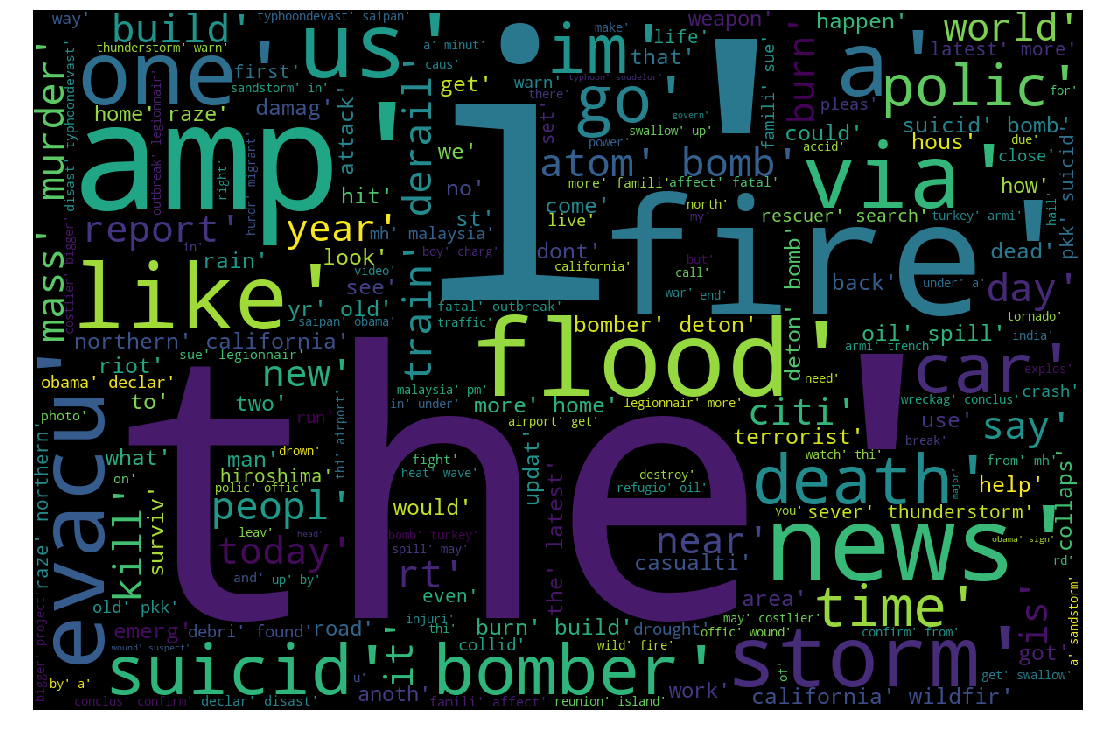

In [38]:
#print(disaster_tweets)

from wordcloud import WordCloud

wordcloud = WordCloud(width = 1200, height = 800, 
                background_color ='black',
                min_font_size = 10).generate(str(disaster_tweets)) 
  
# plot the WordCloud image                        
plt.figure(figsize = (15, 10), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  

# Embedding vocab using gensim Word2Vec

In [43]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")

In [50]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data["tokens"])
sequences = tokenizer.texts_to_sequences(data['tokens'])


In [51]:
X = pad_sequences(sequences,maxlen=120,padding='post',truncating='post')
y = data["target"]

In [52]:
print(sequences[21])
print(tokenizer.word_index['king'])
print(data.iloc[1]['text'])

[946, 478]
1082
Forest fire near La Ronge Sask. Canada


In [22]:
# vector_dim = 300
# emb_model = Word2Vec(tqdm(build_vocab), min_count=1, size=vector_dim, window=2)

# print(f'Word2vec model containts: {len(emb_model.wv.vocab)} words')

100%|██████████| 7613/7613 [00:00<00:00, 149096.43it/s]


Word2vec model containts: 16824 words


In [ ]:
# def define_words_matrix(tokens):
#     embedding_matrix = np.zeros((len(emb_model.wv.vocab), vector_dim))
#     for i in range(len(emb_model.wv.vocab)):
#         embedding_vector = emb_model.wv[emb_model.wv.index2word[i]]
#         if embedding_vector is not None:
#             embedding_matrix[i] = embedding_vector
#             print(f"Indeks: {i}, wektor: {embedding_vector.shape}")
#     return embedding_matrix


In [ ]:
# data["embedded_tokens"] = data["tokens"].apply(lambda x: define_words_matrix(x))

In [ ]:


# data["padded_embedded_tokens"] = data["embedded_tokens"].apply(lambda x: pad_sequences(x, value=0.0))

In [ ]:
# print(emb_model.wv.vocab[str("forest")].index)

# print(emb_model.wv.most_similar("lol"))

# data.head(5)

# Feature selection

In [53]:
#X = data.drop(["id", "keyword", "text", "url_count", "@_count", "tokens", "stemmed_tokens", "location", "target"], axis=1)
# y = data["target"]
# X = data["embedded_tokens"]

In [58]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold

from keras.layers.recurrent import LSTM
from keras.layers.embeddings import Embedding
from keras.models import Model, Sequential
from keras.layers import Dense, Activation
from keras.wrappers.scikit_learn import KerasClassifier
from keras.activations import relu

In [59]:
# print(f"Vocab set contains of:\t{len(emb_model.wv.vocab)} words")
# print(f"Output vocab set:\t{emb_model.wv.syn0.shape[1]} words")

vocab_size=len(tokenizer.word_index)+1
print(vocab_size)
print(pad.shape[1])

16898
120


In [61]:
embedding_layer = Embedding(vocab_size, 64, input_length=pad.shape[1])

model = Sequential()
model.add(embedding_layer)
model.add(Dense(32, activation = 'relu'))   
model.add(Activation('softmax'))


model.compile(optimizer='sgd', loss='mse')

print(model.summary())


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 120, 64)           1081472   
_________________________________________________________________
dense_1 (Dense)              (None, 120, 32)           2080      
_________________________________________________________________
activation_1 (Activation)    (None, 120, 32)           0         
Total params: 1,083,552
Trainable params: 1,083,552
Non-trainable params: 0
_________________________________________________________________
None


In [63]:
history = model.fit(X, y, epochs=1, batch_size=32)

ValueError: Error when checking target: expected activation_1 to have 3 dimensions, but got array with shape (7613, 1)

In [ ]:
epochs = [25]#, 50, 75, 100]
batch_size = [8, 16]#, 32, 64]
#kFold = KFold()

model = KerasClassifier(build_fn=neural_network, verbose=10)
param_grid = dict(batch_size=batch_size, epochs=epochs)

grid = GridSearchCV(estimator=model, param_grid=param_grid, verbose=10, n_jobs=-1)
grid_result = grid.fit(X, y)